In [2]:
import os
import numpy as np
import pandas as pd

from numerize import numerize as nz

import sqlite3
from lets_plot import * # This imports all of ggplot2's functions
LetsPlot.setup_html()

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_FOLDER = os.path.join('D:/Harsshu MBA/ME204/DE-Project')

In [4]:
conn = sqlite3.connect(os.path.join(DATA_FOLDER, './AnimeMovies.db'))

In [5]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('geners',), ('Director',), ('disney_anime_movies',), ('genre',), ('languages',), ('ratings',), ('company_name',), ('country',), ('writer_name',), ('director_name',)]


In [6]:
animation_movies=conn.execute(
    '''
    SELECT 
        m.*, 
        g.genre, 
        w.writer_name, 
        d.director_name,
        l.languages, 
        c.country, 
        p.company_name,
        r.user_rating, r.imdb_rating, r.Metascore, r.rt_score
    FROM disney_anime_movies AS m
    LEFT JOIN genre AS g ON m.title_id = g.title_id
    LEFT JOIN writer_name AS w ON m.title_id = w.title_id
    LEFT JOIN director_name AS d ON m.title_id = d.title_id
    LEFT JOIN languages AS l ON m.title_id = l.title_id
    LEFT JOIN country AS c ON m.title_id = c.title_id
    LEFT JOIN company_name AS p ON m.title_id = p.title_id
    LEFT JOIN ratings AS r ON m.title_id = r.title_id
    '''
).fetchall()

In [7]:
animation_movies

[(0,
  'Famiglia Imbarazzi - La maledizione dello zoccolo ',
  '2025-03-20',
  '1h 36min',
  'Animation',
  None,
  None,
  'Italian',
  None,
  ' Euphorica Srl',
  0.0,
  0.0,
  0.0,
  0.0),
 (0,
  'Famiglia Imbarazzi - La maledizione dello zoccolo ',
  '2025-03-20',
  '1h 36min',
  'Comedy',
  None,
  None,
  'Italian',
  None,
  ' Euphorica Srl',
  0.0,
  0.0,
  0.0,
  0.0),
 (1,
  "Thelma's Perfect Birthday ",
  '2025-03-21',
  '1h 11min',
  'Animation',
  None,
  None,
  'English',
  None,
  ' Rija Films',
  0.0,
  0.0,
  0.0,
  0.0),
 (1,
  "Thelma's Perfect Birthday ",
  '2025-03-21',
  '1h 11min',
  'Family',
  None,
  None,
  'English',
  None,
  ' Rija Films',
  0.0,
  0.0,
  0.0,
  0.0),
 (2,
  'Batman Ninja vs. Yakuza League ',
  '2025-03-17',
  '1h 30min',
  'Action',
  'Kazuki Nakashima',
  'Jumpei Mizusaki',
  'Japanese',
  'Japan',
  ' Kamikaze Douga',
  6.0,
  0.0,
  0.0,
  0.0),
 (2,
  'Batman Ninja vs. Yakuza League ',
  '2025-03-17',
  '1h 30min',
  'Action',
  'Kaz

In [8]:
all_movies= pd.DataFrame(animation_movies, columns=['title_id', 'Title','release_date','run_time', 'genre','writer_name','director_name',
                                             'languages','country','company_name','user_rating','imdb_rating','Metascore','rt_score'])

In [9]:
all_movies["Metascore"] = all_movies["Metascore"].astype(float).astype(int)
all_movies["rt_score"] = all_movies["rt_score"].astype(float).astype(int)
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       12854 non-null  int64  
 1   Title          12854 non-null  object 
 2   release_date   12854 non-null  object 
 3   run_time       12854 non-null  object 
 4   genre          12850 non-null  object 
 5   writer_name    9664 non-null   object 
 6   director_name  11870 non-null  object 
 7   languages      12854 non-null  object 
 8   country        12769 non-null  object 
 9   company_name   12794 non-null  object 
 10  user_rating    12854 non-null  float64
 11  imdb_rating    12854 non-null  float64
 12  Metascore      12854 non-null  int64  
 13  rt_score       12854 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.4+ MB


In [10]:
all_movies.shape

(12854, 14)

In [11]:
all_movies

,title_id,Title,release_date,run_time,genre,writer_name,director_name,languages,country,company_name,user_rating,imdb_rating,Metascore,rt_score
0,0,Famiglia Imbarazzi - La maledizione dello zocc...,2025-03-20,1h 36min,Animation,None,None,Italian,None,Euphorica Srl,0.0,0.0,0,0
1,0,Famiglia Imbarazzi - La maledizione dello zocc...,2025-03-20,1h 36min,Comedy,None,None,Italian,None,Euphorica Srl,0.0,0.0,0,0
2,1,Thelma's Perfect Birthday,2025-03-21,1h 11min,Animation,None,None,English,None,Rija Films,0.0,0.0,0,0
3,1,Thelma's Perfect Birthday,2025-03-21,1h 11min,Family,None,None,English,None,Rija Films,0.0,0.0,0,0
4,2,Batman Ninja vs. Yakuza League,2025-03-17,1h 30min,Action,Kazuki Nakashima,Jumpei Mizusaki,Japanese,Japan,Kamikaze Douga,6.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,1198,TEKKEN: Blood Vengeance,2011-07-26,1h 40min,Animation,Dai Sato,Youichi Mouri,Japanese,Japan,Digital Frontier,6.7,0.0,0,0
12850,1198,TEKKEN: Blood Vengeance,2011-07-26,1h 40min,Science Fiction,Dai Sato,Youichi Mouri,Japanese,Japan,Digital Frontier,6.7,0.0,0,0
12851,1199,The Smurfs: A Christmas Carol,2011-12-02,0h 22min,Animation,None,Troy Quane,English,United States of America,Sony Pictures Animation,6.7,6.1,0,0
12852,1199,The Smurfs: A Christmas Carol,2011-12-02,0h 22min,Comedy,None,Troy Quane,English,United States of America,Sony Pictures Animation,6.7,6.1,0,0


In [12]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       12854 non-null  int64  
 1   Title          12854 non-null  object 
 2   release_date   12854 non-null  object 
 3   run_time       12854 non-null  object 
 4   genre          12850 non-null  object 
 5   writer_name    9664 non-null   object 
 6   director_name  11870 non-null  object 
 7   languages      12854 non-null  object 
 8   country        12769 non-null  object 
 9   company_name   12794 non-null  object 
 10  user_rating    12854 non-null  float64
 11  imdb_rating    12854 non-null  float64
 12  Metascore      12854 non-null  int64  
 13  rt_score       12854 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.4+ MB


In [13]:
# Extracting Release Years and Counting Movies
all_movies['release_date'] = pd.to_datetime(all_movies['release_date'], errors='coerce')
all_movies['Year'] = all_movies['release_date'].dt.year

count_by_year = all_movies['Year'].value_counts().sort_index().reset_index()
count_by_year.columns = ['Year', 'Count']


In [36]:
(ggplot(count_by_year, aes(x='Year', y='Count')) + 
     geom_line(color='#884EA0', size=2) +  # Stylish red line
     geom_point(size=4, color='#FDEDEC', fill='#1B4F72', shape=17, stroke=2) +  # White points with dark blue border
     ggtitle("Number of Movies Released Per Year") +
     xlab("Year") + 
     ylab("Number of Movies") +
     theme_minimal() +
     flavor_high_contrast_light() +  # Dark mode styling
     ggsize(1100, 400) +
     scale_color_viridis() +  # Adds a smooth color gradient
     scale_x_continuous(limits=(count_by_year['Year'].min(), 2025))  # Ensure x-axis extends to 2025
)


In [15]:
# Assuming your DataFrame is named movies_df and has a 'director_name' column
writer_counts = all_movies['writer_name'].value_counts().reset_index()
writer_counts.columns = ['writer_name', 'Count']

# Keep only the top 10 directors
writer_counts = writer_counts.head(10)


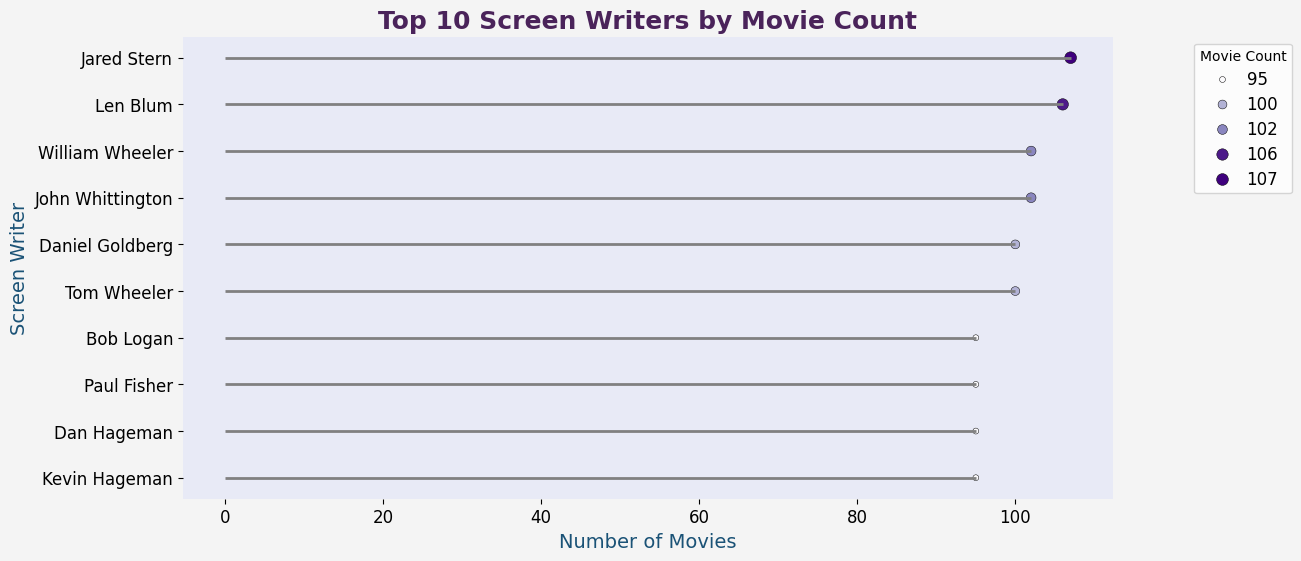

In [16]:
# Set the figure size and background color
plt.figure(figsize=(12, 6), facecolor='#f4f4f4')

ax = plt.gca()
ax.set_facecolor('#e8eaf6')

# Create lines for lollipop effect
plt.hlines(y=writer_counts['writer_name'], xmin=0, xmax=writer_counts['Count'], color='gray', linewidth=2)

# Create scatter points with legend enabled
scatter = sns.scatterplot(x=writer_counts['Count'], y=writer_counts['writer_name'], 
                          size=writer_counts['Count'], hue=writer_counts['Count'], 
                          palette='Purples', legend=True, edgecolor='black')

# Titles and labels with custom text colors
plt.title("Top 10 Screen Writers by Movie Count", fontsize=18, fontweight='bold', color='#4A235A')
plt.xlabel("Number of Movies", fontsize=14, color='#1A5276')
plt.ylabel("Screen Writer", fontsize=14, color='#1A5276')

# Customize legend
legend = scatter.legend_
legend.set_bbox_to_anchor((1.2, 1))
legend.set_title("Movie Count")  # Change legend title
for text in legend.get_texts():
    text.set_color("black")  # Change legend text color
    text.set_fontsize(12)    # Adjust font size

# Change tick labels color
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()


In [17]:
movie_genre_counts = all_movies['genre'].value_counts().head(15).reset_index()
movie_genre_counts.columns = ['genre', 'Count']

In [18]:
movie_genre_counts['genre'] = movie_genre_counts['genre'].astype(str)

genre_plot = (
    ggplot(movie_genre_counts, aes(x='genre', y='Count', fill='Count')) +
    geom_bar(stat='identity', width=0.7, alpha=0.9, show_legend=True) +  
    geom_text(aes(label='Count'), format_string='{:.0f}', size=8, color='black', vjust=-0.3) +  
    scale_fill_gradient(low='#87CEFA', high='#FF4500') +  # Gradient from blue to red
    ggtitle("Top 15 Movie Count by Genres") +
    xlab("Genre") + 
    ylab("Movie Count") +
    theme_minimal() +
    theme(
        axis_text_x=element_text(size=14, color="black"),
        axis_text_y=element_text(size=14, color="black"),
        plot_title=element_text(size=20, face="bold",color='black'),
        panel_grid_major_x=element_line(color="gray", linetype="dashed")
    )+
    ggsize(1000,500)
)

genre_plot


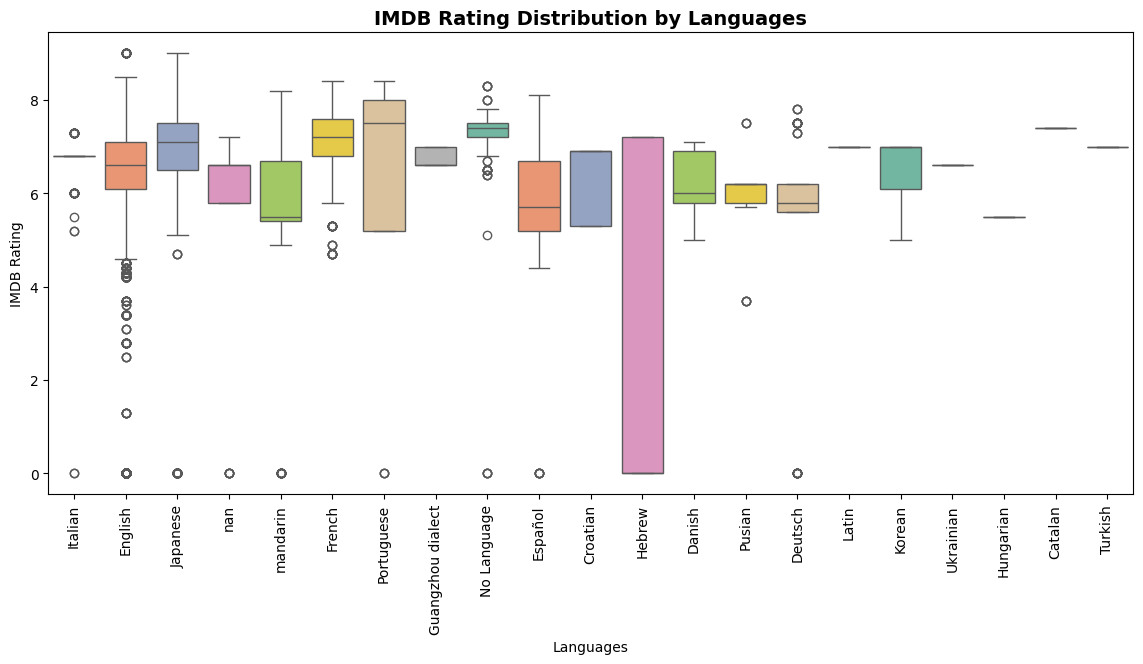

In [19]:
# Explode genre column (assuming it's a list)
all_movies_exploded = all_movies.explode('languages')

plt.figure(figsize=(14, 6))

# Fixed: Assign `genre` to `hue` and disable legend
sns.boxplot(data=all_movies_exploded, x='languages', y='imdb_rating', hue='languages', palette='Set2', legend=False)

plt.xticks(rotation=90)
plt.title("IMDB Rating Distribution by Languages", fontsize=14, fontweight='bold')
plt.xlabel("Languages")
plt.ylabel("IMDB Rating")
plt.grid(True, linestyle='', alpha=0.6)
plt.show()


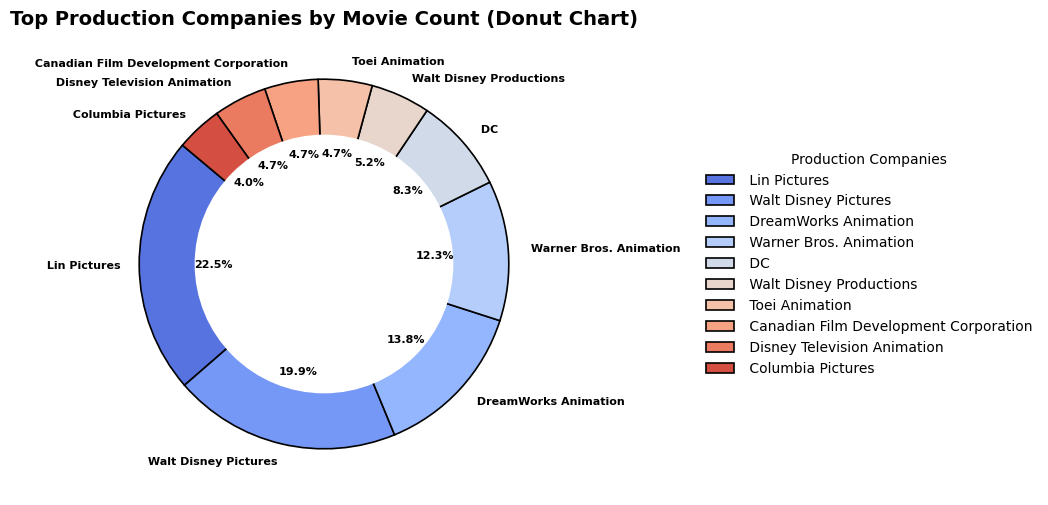

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure width to create space for the legend
plt.figure(figsize=(20, 6))  

# Get top 10 production companies by count
company_counts = all_movies['company_name'].value_counts().head(10)

# Define colors for donut chart
colors = sns.color_palette("coolwarm", len(company_counts))

# Create donut chart
wedges, texts, autotexts = plt.pie(
    company_counts.values, labels=company_counts.index, autopct='%1.1f%%',
    colors=colors, startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
    textprops={'fontsize': 8, 'weight': 'bold'}
)

# Create a white circle at the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add legend outside the chart
plt.legend(
    wedges, company_counts.index,
    title="Production Companies",
    loc="center left",
    bbox_to_anchor=(1.3, 0.5),
    frameon=False
)

# Add title
plt.title("Top Production Companies by Movie Count (Donut Chart)", fontsize=14, fontweight='bold')

# Adjust layout to ensure nothing gets cut off
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()


In [21]:
# Convert 'run_time' to string first to ensure compatibility with .str methods
all_movies['run_time'] = all_movies['run_time'].astype(str)

# Extract numeric values (minutes) from 'run_time' and convert to float
all_movies['run_time'] = all_movies['run_time'].str.extract(r'(\d+)').astype(float)

# Check if the conversion worked
print(all_movies[['run_time']].head())


   run_time
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0


In [22]:
all_movies['run_time'] = all_movies['run_time'].fillna(all_movies['run_time'].median())


In [23]:


(ggplot(all_movies, aes(x='run_time', y='Metascore')) + 
    geom_point(aes(color='Metascore'), alpha=0.8, size=3.5) +  
    geom_smooth(method='loess', color='darkblue', size=2, linetype='dashed') +  
    scale_color_gradient(low='blue', high='red') +  
    
    
    ggtitle("Movie Duration vs. Metascore Rating") +  
    theme(plot_title=element_text(size=22, face="bold", color="black", hjust=0.5, vjust=-0.5)) +  

    xlab("Movie Runtime (Minutes)") + 
    ylab("Metascore") + 

    theme_minimal() +  
    
    theme(axis_text_x=element_text(size=14, face="bold"), 
          axis_text_y=element_text(size=14, face="bold"),
          axis_title_x=element_text(size=16, face="bold"), 
          axis_title_y=element_text(size=16, face="bold"),
          legend_position="right",  
          legend_title=element_text(size=14, face="bold"),
          legend_text=element_text(size=12)) +  

    ggsize(1200, 600)  
)


In [24]:


movies_df_exploded = all_movies.explode('genre')  # Expand multiple genres

# Get top 10 countries by movie count
top_countries = movies_df_exploded['country'].value_counts().nlargest(15).index
movies_filtered = movies_df_exploded[movies_df_exploded['country'].isin(top_countries)].copy()

# Generate stacked bar plot
plot = (
    ggplot(movies_filtered, aes(x='genre', fill='country')) +  
    geom_bar(stat='count', position='stack') +  
    scale_fill_brewer(type='qual', palette="Paired") +  
    ggtitle("Movie Count by Genre Across Top 15 Countries") +  
    theme_minimal() +  
    theme(
        plot_title=element_text(size=22, face="bold", hjust=0.5, color="darkblue"),  
        axis_text_x=element_text(size=14, face="bold", angle=45),  
        axis_text_y=element_text(size=14, face="bold"),  
        axis_title_x=element_text(size=16, face="bold"),  
        axis_title_y=element_text(size=16, face="bold"),  
        legend_title=element_text(size=14, face="bold"),  
        legend_text=element_text(size=12),  
        legend_position="right"  
    ) + 
    ggsize(1200, 500)  
)

# Display the plot
display(plot)

In [34]:
import pandas as pd
import plotly.express as px
import itertools

# Data Cleaning
all_movies['Year'] = pd.to_datetime(all_movies['release_date'], errors='coerce').dt.year
all_movies['genre'] = all_movies['genre'].astype(str).str.strip()

# Drop missing Year/Genre entries
movies_df_cleaned = all_movies.dropna(subset=['Year', 'genre'])

# Aggregate movie counts
genre_yearly_counts = movies_df_cleaned.groupby(['Year', 'genre']).size().reset_index(name='Count')

# Fill missing genre-year pairs
years = sorted(movies_df_cleaned['Year'].dropna().unique())
genres = movies_df_cleaned['genre'].unique()

full_data = pd.DataFrame(itertools.product(years, genres), columns=['Year', 'genre'])
genre_yearly_counts = full_data.merge(genre_yearly_counts, on=['Year', 'genre'], how='left').fillna(0)

# Animated Scatter Plot
fig = px.scatter(
    genre_yearly_counts,
    x="Year",
    y="Count",
    size="Count",
    color="genre",
    animation_frame="Year",
    animation_group="genre",
    hover_name="genre",
    size_max=60,
    title="🎬 Genre-wise Movie Growth Over the Years",
    labels={"genre": "Genre", "Count": "Number of Movies", "Year": "Release Year"},
    range_x=[movies_df_cleaned['Year'].min(), movies_df_cleaned['Year'].max()],
    range_y=[0, genre_yearly_counts['Count'].max() + 5]
)

# Improved Styling
fig.update_layout(
    template="plotly_white",
    xaxis=dict(title="Year", showgrid=True, tickangle=45),
    yaxis=dict(title="Number of Movies", showgrid=True),
    legend_title="Genre",
    font=dict(size=12)
)

# Show plot
fig.show()


In [26]:
movies_plot = all_movies.sort_values(by='imdb_rating', ascending=False)
tooltip_setup = (
    layer_tooltips()
        .line('@genre')
        .line('[@imdb_rating]')
        
        
)

anime = (
    # Maps the columns to the aesthetics of the plot.
    ggplot(movies_plot, aes(y='genre', x='imdb_rating',fill='genre')) +

    # GEOMS

    # Add a line range that 'listens to' columns informed in `ymin` and `ymax` aesthetics
    #geom_linerange(size=1, alpha=0.75, tooltips=tooltip_setup) +

    # Add points to the plot (listen to `x` and `y` and fill aesthetics)
    geom_point(size=3, stroke=1, shape=21, tooltips=tooltip_setup) +

    # SCALES

    # Remove the legend (we can already read the categories from the y-axis)
    #scale_fill_discrete(guide='none') +

    # Specify names for the axes
    scale_y_continuous(name="Genre", expand=[0.05, 0.05]) +
    scale_x_continuous(name="imdb_rating ", expand=[0., 0.05], format=' {.2f}', breaks=np.arange(0, 20, 0.5)) +

    # LABELS
    # It's nice when the plot tells you the key takeaways
    labs(title='"IMDB Rating by Movie Genre "',
         subtitle="Dots represent the IMDB Rating") +
    theme(axis_text_x=element_text(size=15),
        axis_text_y=element_text(size=17),
        axis_title_x=element_text(size=20),
        axis_title_y=element_text(size=20),
        plot_title=element_text(size=19, face='bold'),
        plot_subtitle=element_text(size=18),
        legend_position='bottom') +
    ggsize(1000, 600)

)

anime

In [27]:
type(all_movies)


pandas.core.frame.DataFrame

In [28]:
print(all_movies.columns)

Index(['title_id', 'Title', 'release_date', 'run_time', 'genre', 'writer_name',
       'director_name', 'languages', 'country', 'company_name', 'user_rating',
       'imdb_rating', 'Metascore', 'rt_score', 'Year'],
      dtype='object')


In [33]:
import pandas as pd
import plotly.express as px

# Data Cleaning: Ensure runtime is numeric and valid
all_movies['run_time'] = pd.to_numeric(all_movies['run_time'], errors='coerce')

# Filter valid runtime values
movies_data_cleaned = all_movies[(all_movies['run_time'] > 0) & (all_movies['run_time'] < 300)]

# Identify Top 15 Genres with the Most Movies
top_15_genres = movies_data_cleaned['genre'].value_counts().nlargest(15).index
top_15_data = movies_data_cleaned[movies_data_cleaned['genre'].isin(top_15_genres)]

# Aggregate data: Calculate average runtime per genre
genre_runtime_avg = top_15_data.groupby('genre', as_index=False)['run_time'].mean()

# Create Line Chart
fig = px.line(
    genre_runtime_avg,
    x='genre',
    y='run_time',
    markers=True,                      # Show markers at each point
    title='📈 Average Runtime of Top 15 Genres (Line Chart)',
    labels={'genre': 'Genre', 'run_time': 'Average Runtime (minutes)'},
    height=600,
    width=1000
)

# Enhance Visuals
fig.update_layout(
    template='plotly_white',            # Clean, modern template
    xaxis=dict(title="Genre", tickangle=45),
    yaxis=dict(title="Average Runtime (minutes)"),
    font=dict(size=12)
)

fig.show()